In [37]:
import mplsoccer

import pandas as pd
import numpy as np
import math
import ast
import sklearn


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch


from tqdm import tqdm

In [36]:
data = pd.read_csv('../content/shots_data_2015_25.csv')

In [38]:
data.columns

Index(['Unnamed: 0', 'level_0', 'id', 'index', 'play_pattern', 'location',
       'shot', 'possession_team', 'type', 'outcome', 'body_part', 'players',
       'home_team', 'follows_dribble', 'teammates_in_box', 'teammates_ahead',
       'opp_in_box', 'gk_dist_from_goal', 'gk_dist_from_player', 'gk_x',
       'gk_y', 'opponents_near', 'x', 'y', 'distance', 'angle'],
      dtype='object')

In [39]:
data.drop(columns=['Unnamed: 0','level_0'],inplace=True)

In [40]:
data

,id,index,play_pattern,location,shot,possession_team,type,outcome,body_part,players,...,opp_in_box,gk_dist_from_goal,gk_dist_from_player,gk_x,gk_y,opponents_near,x,y,distance,angle
0,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,Regular Play,"[114.6, 33.5]","{'statsbomb_xg': 0.14338115, 'end_location': [...",Bayer Leverkusen,Open Play,0,Left Foot,"[{'location': [92.1, 63.8], 'player': {'id': 8...",...,6.0,3.981206,4.701064,118.3,36.4,0.0,114.6,33.5,8.450444,37.941499
1,bb53b537-1685-4019-9e8f-98f3805828eb,848,Regular Play,"[89.2, 42.5]","{'statsbomb_xg': 0.021271583, 'end_location': ...",Bayer Leverkusen,Open Play,0,Left Foot,"[{'location': [103.8, 39.7], 'player': {'id': ...",...,5.0,3.101612,27.803777,116.9,40.1,0.0,89.2,42.5,30.901294,14.704957
2,b6b96d19-97e3-4770-996a-f20696123abe,990,Regular Play,"[105.4, 45.1]","{'statsbomb_xg': 0.082292914, 'end_location': ...",Werder Bremen,Open Play,0,Right Foot,"[{'location': [100.3, 62.3], 'player': {'id': ...",...,4.0,3.106445,12.472369,117.4,41.7,1.0,105.4,45.1,15.465122,27.626114
3,8cf6ed6f-59f8-455f-8930-f5b71f06c180,1696,Regular Play,"[113.1, 27.5]","{'statsbomb_xg': 0.07415738, 'end_location': [...",Bayer Leverkusen,Open Play,0,Left Foot,"[{'location': [118.2, 35.0], 'player': {'id': ...",...,6.0,5.314132,9.069730,118.2,35.0,0.0,113.1,27.5,14.277955,16.374678
4,6db2523e-9343-461c-a8d6-b202470c1e0b,2573,Regular Play,"[97.5, 40.8]","{'statsbomb_xg': 0.048408102, 'end_location': ...",Werder Bremen,Open Play,0,Left Foot,"[{'location': [101.1, 33.9], 'player': {'id': ...",...,2.0,2.236068,20.303941,117.8,40.4,0.0,97.5,40.8,22.514218,20.137024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20963,be0e299a-5792-4aed-bfe0-9d9d9145c097,2462,Regular Play,"[100.1, 31.7]","{'statsbomb_xg': 0.04493596, 'end_location': [...",Belgium,Open Play,0,Left Foot,"[{'location': [108.6, 37.9], 'player': {'id': ...",...,6.0,2.831960,18.915602,117.9,38.1,0.0,100.1,31.7,21.561540,19.526781
20964,084939b5-a5d1-4ca5-a33c-9bc6132cddce,700,Regular Play,"[109.5, 43.3]","{'statsbomb_xg': 0.052362066, 'end_location': ...",Switzerland,Open Play,0,Head,"[{'location': [110.8, 54.2], 'player': {'id': ...",...,7.0,1.931321,9.080198,118.2,40.7,1.0,109.5,43.3,11.006362,38.622573
20965,852f7472-a3cf-4eda-969c-6c309236e306,901,Regular Play,"[102.7, 48.3]","{'statsbomb_xg': 0.110931315, 'end_location': ...",Switzerland,Open Play,0,Left Foot,"[{'location': [107.2, 53.0], 'player': {'id': ...",...,6.0,2.420744,16.834488,118.1,41.5,0.0,102.7,48.3,19.188017,21.453877
20966,bbf61548-3506-4b1e-8f39-5f312907f01f,1888,Regular Play,"[108.2, 47.7]","{'statsbomb_xg': 0.100927465, 'end_location': ...",Wales,Open Play,0,Head,"[{'location': [93.6, 59.2], 'player': {'id': 2...",...,6.0,2.000000,12.463146,118.0,40.0,0.0,108.2,47.7,14.090067,27.346887


In [47]:
data['body_part'].value_counts()

,count
body_part,
Right Foot,11737
Left Foot,7451


Only considering shots from kicks in this modelling

In [51]:
data = data[data['body_part'].isin(['Right Foot','Left Foot'])]

## Distribution of dependant variable

In [52]:
data['outcome'].value_counts()

,count
outcome,
0,17304
1,1884


We have a highly imbalanced dataset for positive samples

# Vizualizing shots and goals on the football pitch

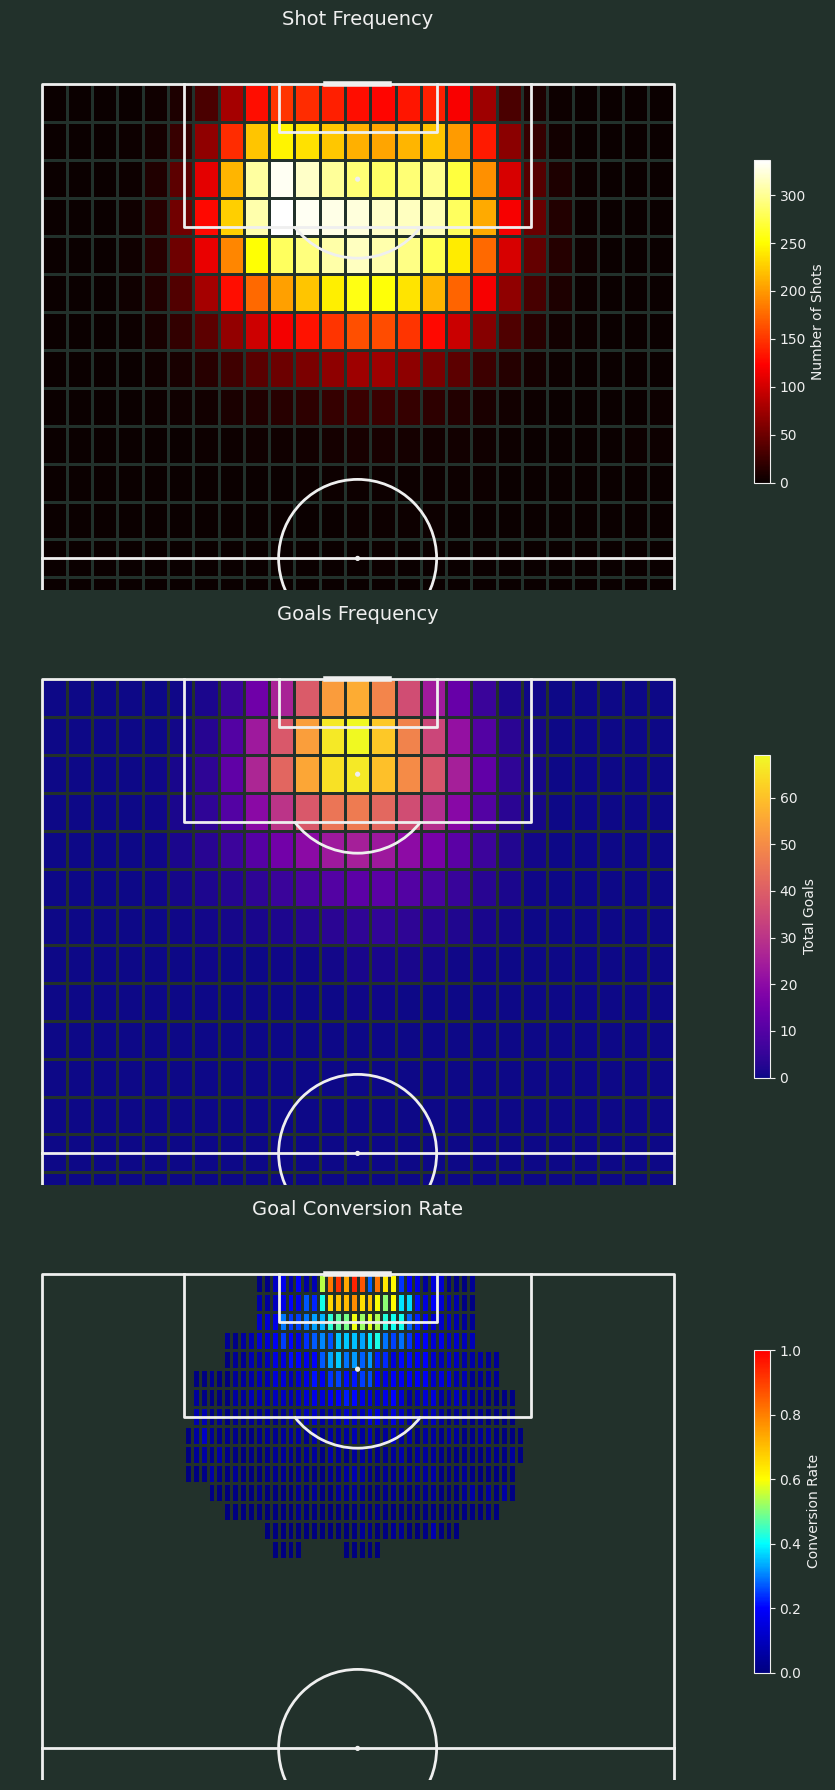

Total shots: 19188
Total goals: 1884
Overall conversion rate: 9.82%
Most common shot location: x=102.9, y=39.7


In [59]:
from mplsoccer import VerticalPitch

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import VerticalPitch


# Setup vertical half pitch - using standard dimensions
pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=2,
                      pitch_color='#22312b', line_color='#efefef')

# Create the figure with vertical arrangement and larger size
fig, axes = plt.subplots(3, 1, figsize=(10, 18))
fig.set_facecolor('#22312b')

# 1. Shot Frequency Heatmap
ax1 = axes[0]
pitch.draw(ax=ax1)
ax1.set_title('Shot Frequency', color='#efefef', fontsize=14, pad=20)

# Create bins for shot frequency
bin_statistic_freq = pitch.bin_statistic(data.x, data.y, statistic='count', bins=(25, 25))
bin_statistic_freq['statistic'] = gaussian_filter(bin_statistic_freq['statistic'], 1)
pcm1 = pitch.heatmap(bin_statistic_freq, ax=ax1, cmap='hot', edgecolors='#22312b')

# Add colorbar
cbar1 = fig.colorbar(pcm1, ax=ax1, shrink=0.6)
cbar1.outline.set_edgecolor('#efefef')
cbar1.ax.yaxis.set_tick_params(color='#efefef')
cbar1.ax.set_ylabel('Number of Shots', color='#efefef')
plt.setp(plt.getp(cbar1.ax.axes, 'yticklabels'), color='#efefef')

# 2. Goals Frequency Heatmap
ax2 = axes[1]
pitch.draw(ax=ax2)
ax2.set_title('Goals Frequency', color='#efefef', fontsize=14, pad=20)

# Calculate goals frequency as total goals from each area
bin_statistic_goals = pitch.bin_statistic(data.x, data.y, values=data.outcome,
                                         statistic='sum', bins=(25, 25))
bin_statistic_goals['statistic'] = gaussian_filter(bin_statistic_goals['statistic'], 1)

pcm2 = pitch.heatmap(bin_statistic_goals, ax=ax2, cmap='plasma', edgecolors='#22312b')

# Add colorbar
cbar2 = fig.colorbar(pcm2, ax=ax2, shrink=0.6)
cbar2.outline.set_edgecolor('#efefef')
cbar2.ax.yaxis.set_tick_params(color='#efefef')
cbar2.ax.set_ylabel('Total Goals', color='#efefef')
plt.setp(plt.getp(cbar2.ax.axes, 'yticklabels'), color='#efefef')

# 3. Goal Conversion Rate Heatmap
ax3 = axes[2]
pitch.draw(ax=ax3)
ax3.set_title('Goal Conversion Rate', color='#efefef', fontsize=14, pad=20)

# Create bins for goal conversion rate (goals/total shots)
bin_statistic_rate = pitch.bin_statistic(data.x, data.y, values=data.outcome,
                                        statistic='mean', bins=(50, 80))
bin_statistic_rate['statistic'] = gaussian_filter(bin_statistic_rate['statistic'], 0.5)

# Custom colormap for conversion rate (blue to red)
colors = ['#000080', '#0000FF', '#00FFFF', '#FFFF00', '#FF8000', '#FF0000']
custom_cmap = LinearSegmentedColormap.from_list('conversion', colors)

pcm3 = pitch.heatmap(bin_statistic_rate, ax=ax3, cmap=custom_cmap,
                     edgecolors='#22312b', vmin=0, vmax=1)

# Add colorbar
cbar3 = fig.colorbar(pcm3, ax=ax3, shrink=0.6)
cbar3.outline.set_edgecolor('#efefef')
cbar3.ax.yaxis.set_tick_params(color='#efefef')
cbar3.ax.set_ylabel('Conversion Rate', color='#efefef')
plt.setp(plt.getp(cbar3.ax.axes, 'yticklabels'), color='#efefef')
plt.tight_layout()
plt.show()

# Print some basic statistics
print(f"Total shots: {len(data)}")
print(f"Total goals: {data.outcome.sum()}")
print(f"Overall conversion rate: {data.outcome.mean():.2%}")
print(f"Most common shot location: x={data.x.median():.1f}, y={data.y.median():.1f}")

## Checking the distribution of features for positive and negative samples

<Axes: xlabel='distance', ylabel='Count'>

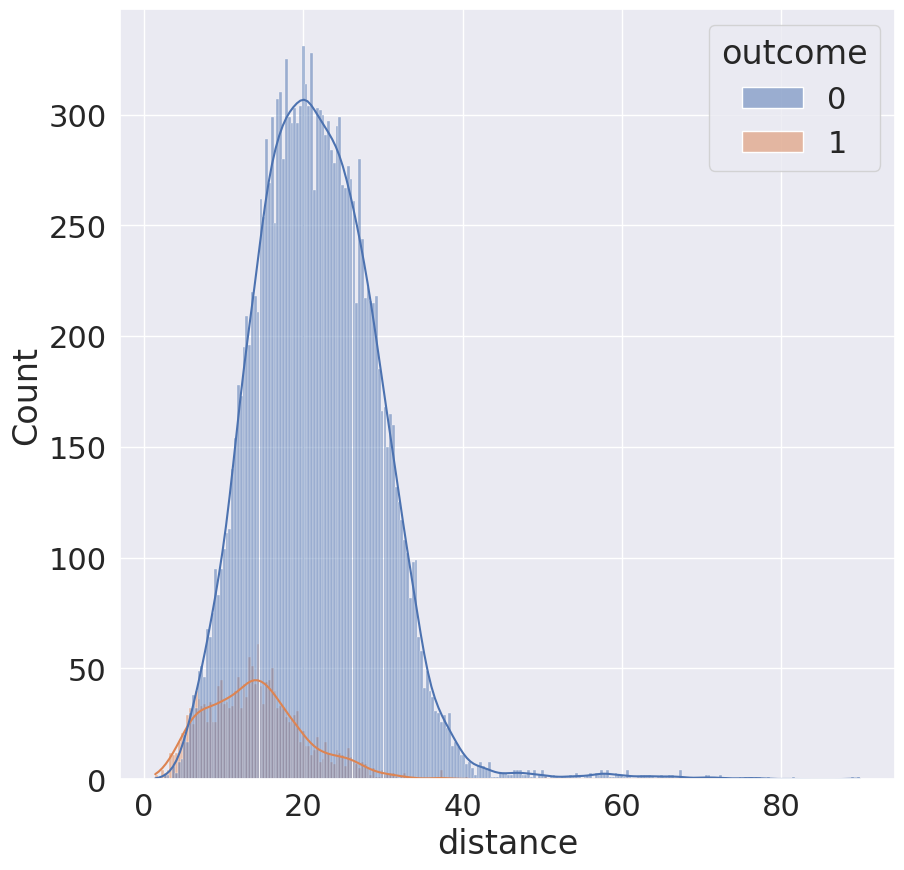

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data, x='distance' , bins=250 , kde=True, hue='outcome')

<Axes: xlabel='angle', ylabel='Count'>

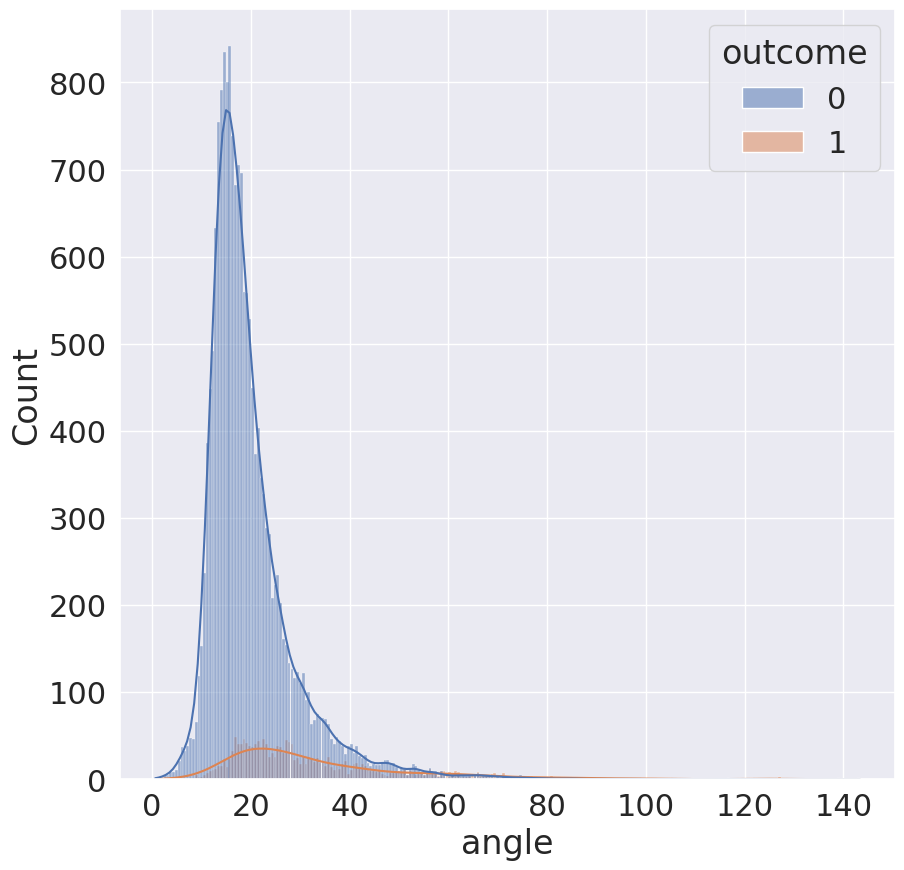

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data, x='angle' , bins=250 , kde=True, hue='outcome')

## The separation between the peaks of the distribution of the two classes over the feature corresponds to its imporance in modelling

<Axes: xlabel='gk_dist_from_player', ylabel='Count'>

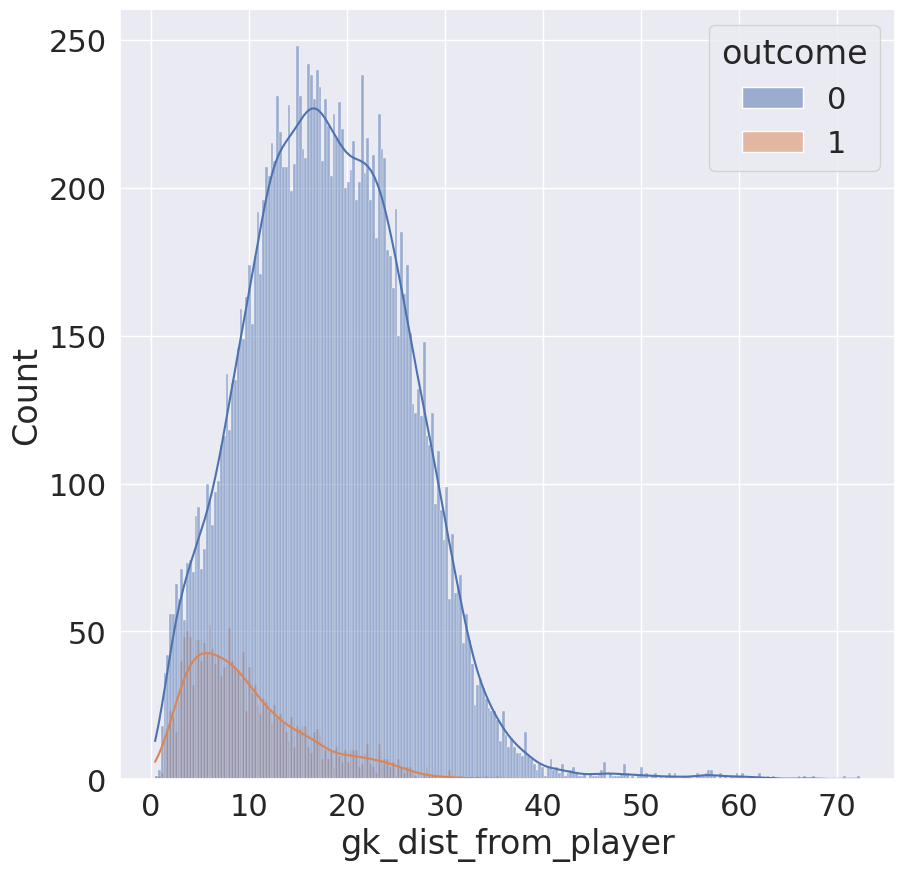

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data, x='gk_dist_from_player' , bins=250 , kde=True, hue='outcome')

### Goalkeeper distance from goal has high separation between the two classes, potentially an important feature

<Axes: xlabel='gk_dist_from_goal', ylabel='Count'>

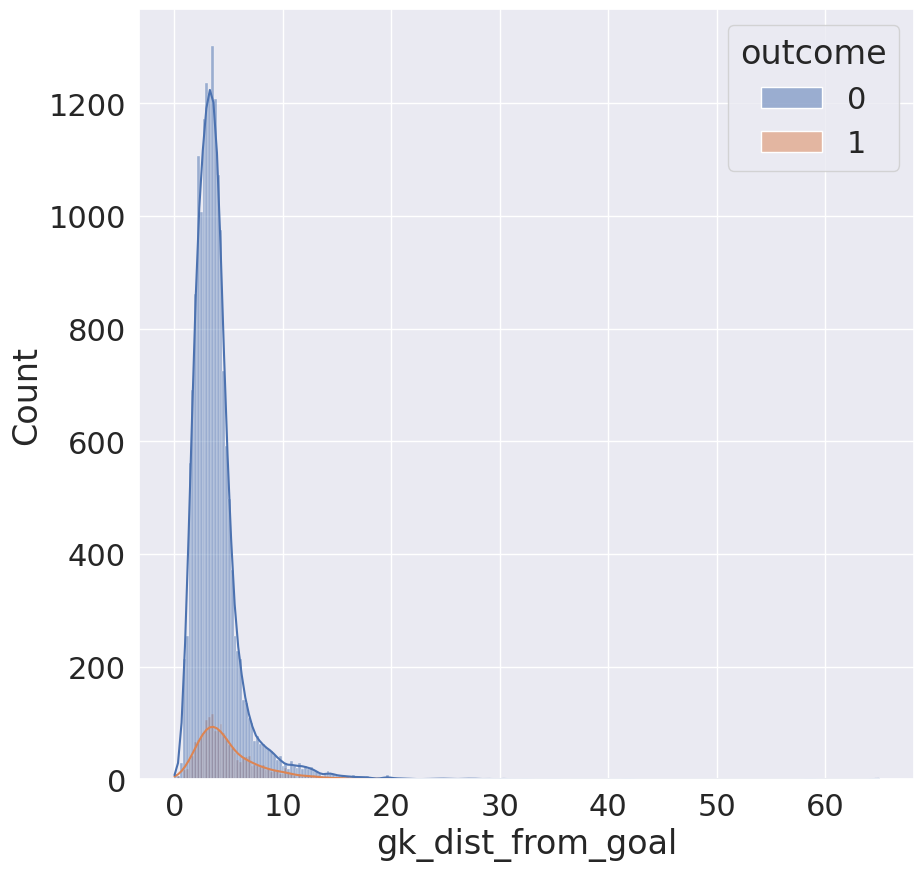

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.histplot(data=data, x='gk_dist_from_goal' , bins=250 , kde=True, hue='outcome')

In [ ]:
data_subset = data[(data['gk_dist_from_goal']<20)&(data['gk_dist_from_player']<30)]

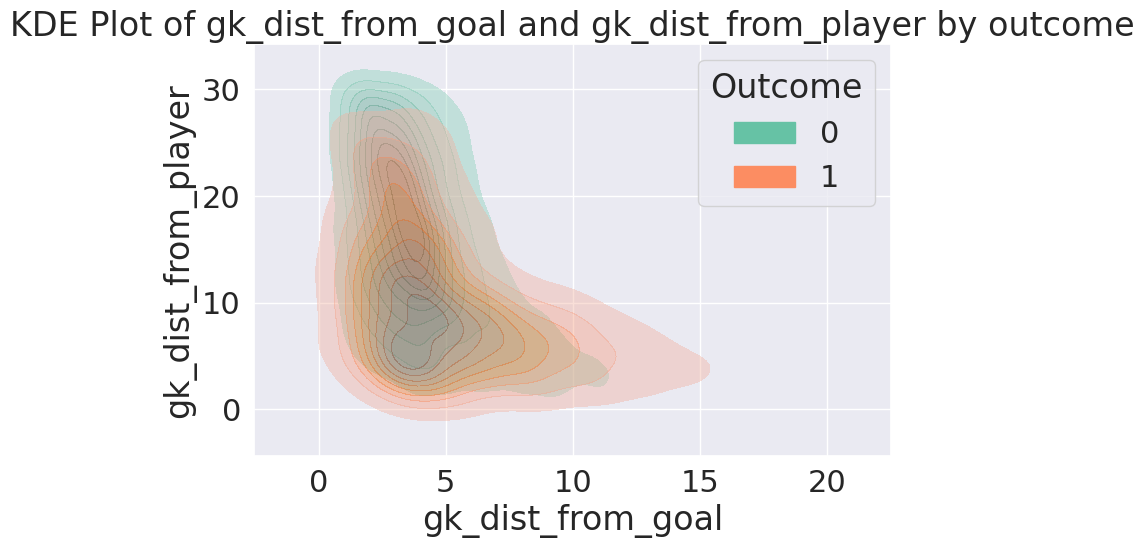

In [ ]:
palette = sns.color_palette('Set2', n_colors=data_subset['outcome'].nunique())
target_classes = data_subset['outcome'].unique()
color_dict = dict(zip(target_classes, palette))

plt.figure(figsize=(8, 6))
for category in data_subset['outcome'].unique():
    subset = data_subset[data_subset['outcome'] == category]
    sns.kdeplot(
        x=subset['gk_dist_from_goal'],
        y=subset['gk_dist_from_player'],
        fill=True,
        alpha=0.4,
        color=color_dict[category]
    )
handles = [Patch(color=color_dict[cat], label=cat) for cat in target_classes]
plt.legend(handles=handles, title='Outcome')


plt.title("KDE Plot of gk_dist_from_goal and gk_dist_from_player by outcome")
plt.tight_layout()
plt.show()

The top-left corresponds to shots from far and goalkeeper is in the goal leading to more saves and bottom right corresponds to instances where the goalkeeper was off his line

We can also observe a separation between the peaks of the distributions corresponding to the two classes

## Checking distribution for categorical features

In [ ]:
data.columns

Index(['id', 'index', 'play_pattern', 'location', 'shot', 'possession_team',
       'type', 'outcome', 'body_part', 'players', 'home_team',
       'follows_dribble', 'teammates_in_box', 'teammates_ahead', 'opp_in_box',
       'gk_dist_from_goal', 'gk_dist_from_player', 'gk_x', 'gk_y',
       'opponents_near', 'x', 'y', 'distance', 'angle'],
      dtype='object')

Contingency Table:
outcome       0     1
home_team            
0          7921   833
1          9383  1051


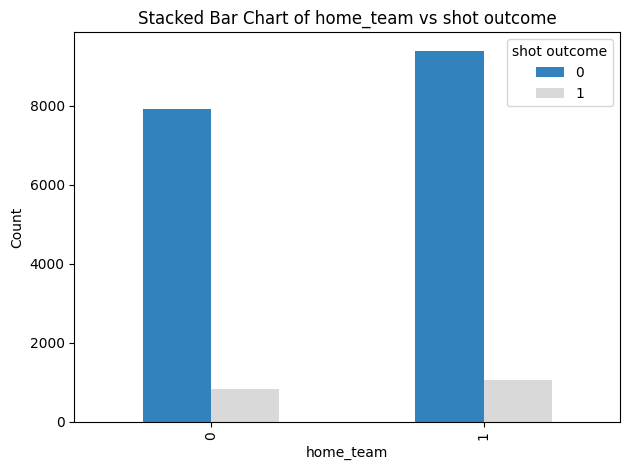

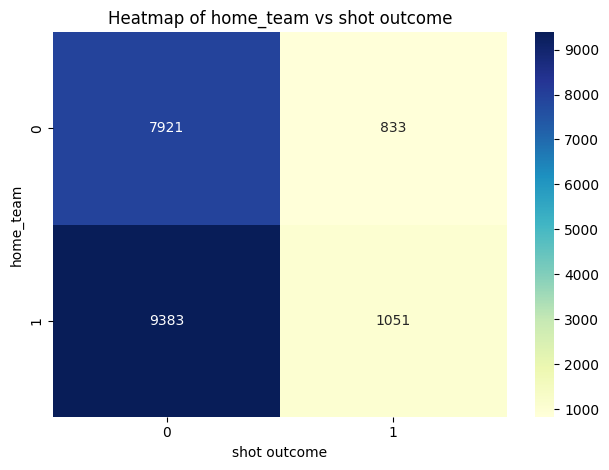


------------------------------------------------------------------------------------------------------------------------------------------------------

Contingency Table:
outcome              0     1
follows_dribble             
0                17301  1883
1                    3     1


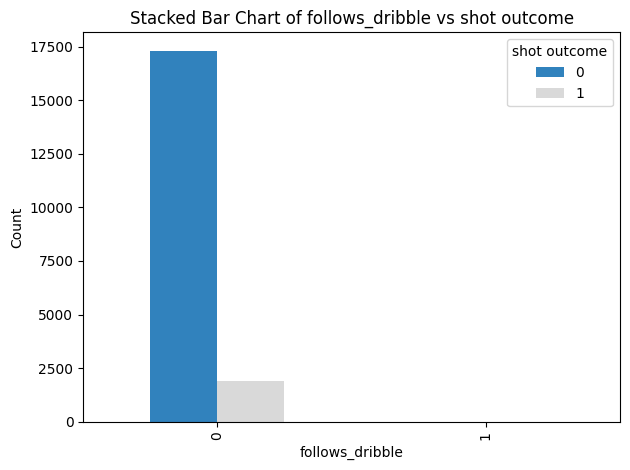

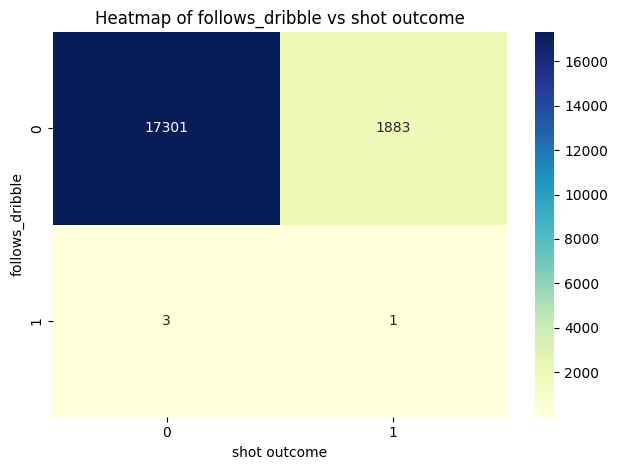


------------------------------------------------------------------------------------------------------------------------------------------------------

Contingency Table:
outcome              0    1
teammates_in_box           
0.0               3895  309
1.0               3828  473
2.0               4489  535
3.0               3418  394
4.0               1360  137
5.0                275   30
6.0                 36    6
7.0                  3    0


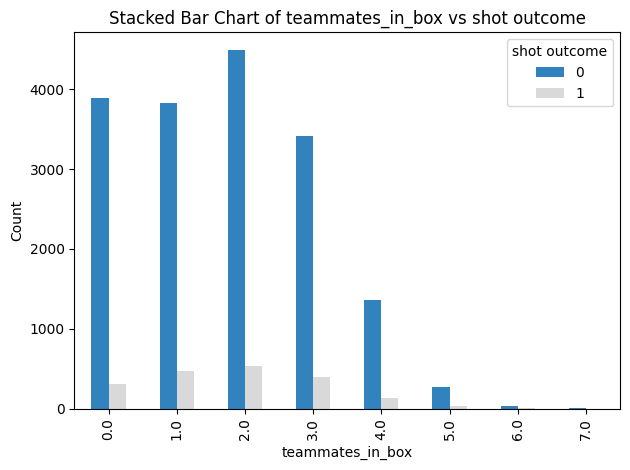

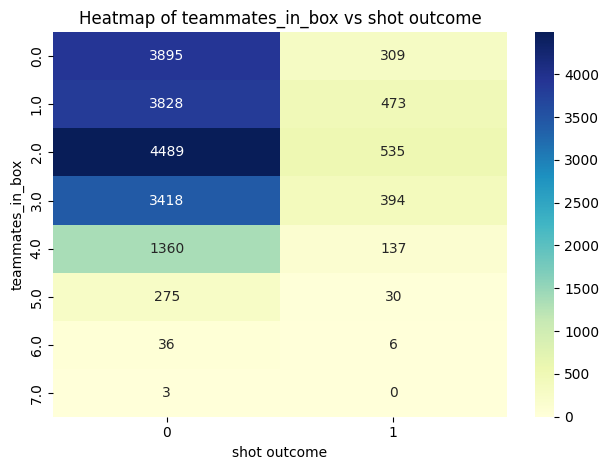


------------------------------------------------------------------------------------------------------------------------------------------------------

Contingency Table:
outcome             0    1
teammates_ahead           
0.0              3655  820
1.0              3220  502
2.0              3520  281
3.0              3161  171
4.0              2229   74
5.0              1092   30
6.0               338    6
7.0                83    0
8.0                 6    0


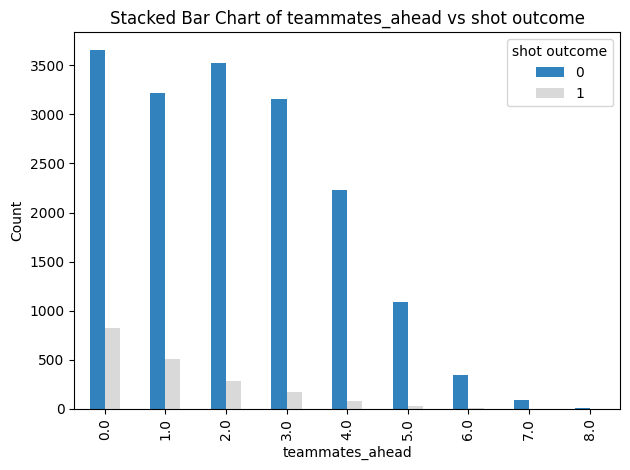

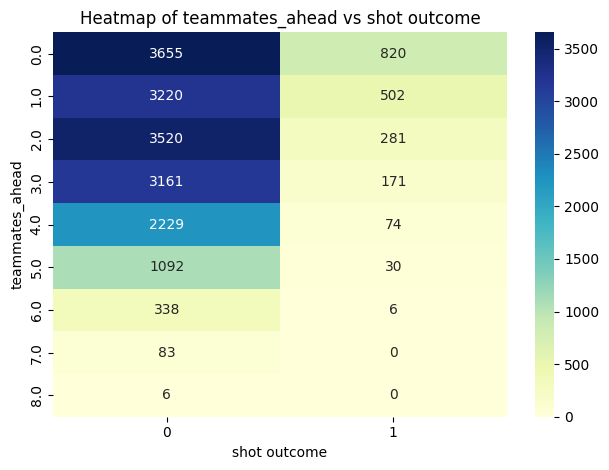


------------------------------------------------------------------------------------------------------------------------------------------------------

Contingency Table:
outcome        0    1
opp_in_box           
0.0         2134   54
1.0         1053  119
2.0         1514  188
3.0         2368  282
4.0         3126  370
5.0         2955  390
6.0         2318  277
7.0         1344  153
8.0          446   44
9.0           44    6
10.0           2    1


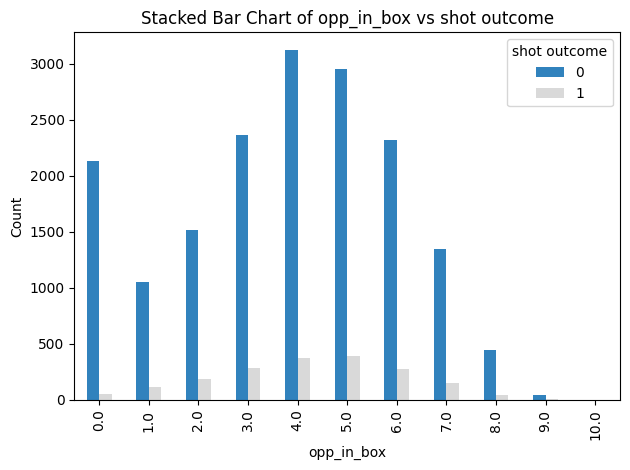

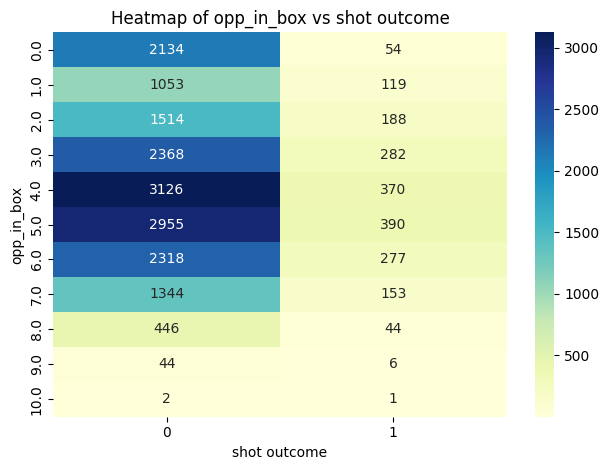


------------------------------------------------------------------------------------------------------------------------------------------------------

Contingency Table:
outcome             0     1
opponents_near             
0.0             16568  1767
1.0               722   116
2.0                14     1


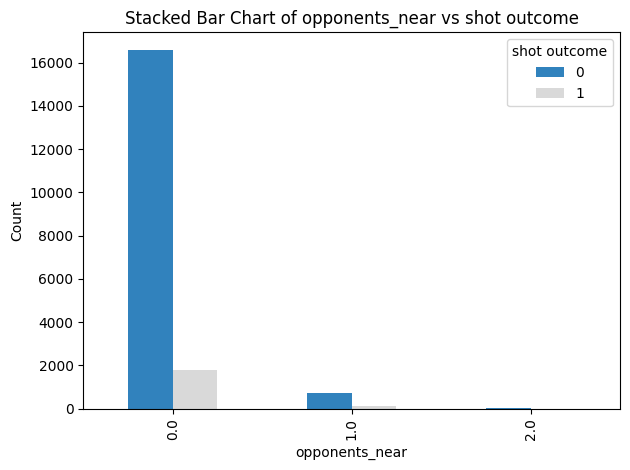

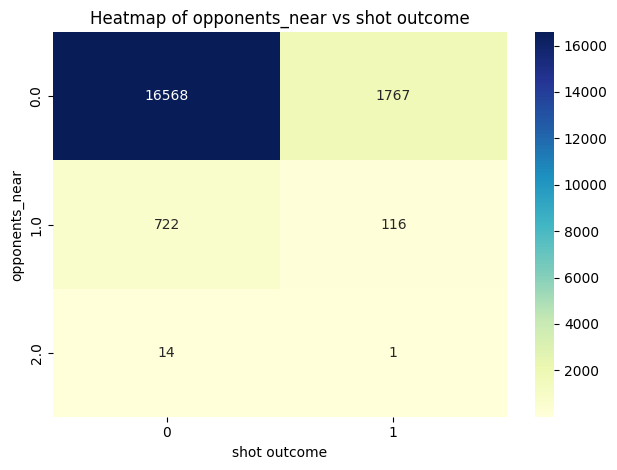


------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
for col in [ 'home_team','follows_dribble', 'teammates_in_box', 'teammates_ahead', 'opp_in_box','opponents_near']:
  crosstab = pd.crosstab(data[col], data['outcome'])
  print("Contingency Table:")
  print(crosstab)

  # Stacked bar plot
  crosstab.plot(kind='bar', stacked=False, colormap='tab20c')
  plt.title(f'Stacked Bar Chart of {col} vs shot outcome')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.legend(title='shot outcome')
  plt.tight_layout()
  plt.show()

  # Heatmap
  sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
  plt.title(f'Heatmap of {col} vs shot outcome')
  plt.xlabel('shot outcome')
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()

  print()
  print('-'*150)
  print()

## Categorical features with similar distribution of the target variable across all its classes provide less value as features in modelling

Follows_dribble feature provides very little value in modelling and can be considered for dropping 